In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load training data
train_data = pd.read_csv('train.csv')
train_data = train_data.drop(['Id'], axis=1)
train_data.head()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0,1,1,1,0,0,0,0,0,0,0,0,15
4,0,0,0,1,0,0,1,0,0,0,0,0,72


C:\Users\HP\AppData\Local\Temp\ipykernel_24228\1875936277.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Pawpularity'])


count    9912.000000
mean       38.039044
std        20.591990
min         1.000000
25%        25.000000
50%        33.000000
75%        46.000000
max       100.000000
Name: Pawpularity, dtype: float64


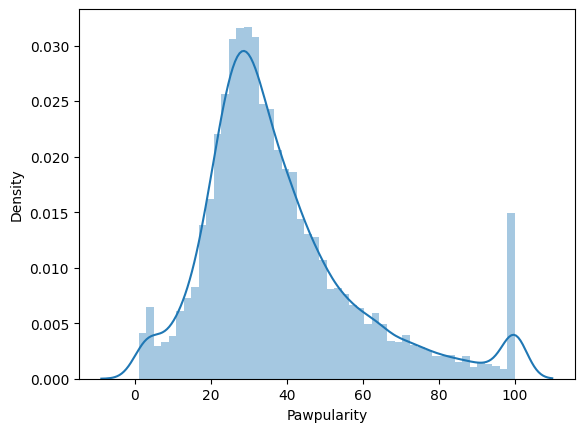

In [4]:
# Analyse the distribution of the target variable
output_summary = train_data['Pawpularity'].describe()
sns.distplot(train_data['Pawpularity'])
print(output_summary)


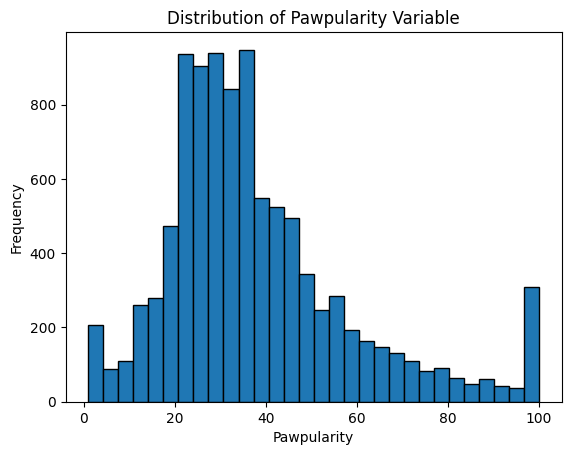

In [5]:

plt.hist(train_data['Pawpularity'], bins=30, edgecolor='black')
plt.title('Distribution of Pawpularity Variable')
plt.xlabel('Pawpularity')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Get the names of the columns and exclude the target variable
cols = train_data.columns
cols = cols.drop('Pawpularity') 
cols

Index(['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group',
       'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],
      dtype='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_24228\1805786568.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, i + 1)


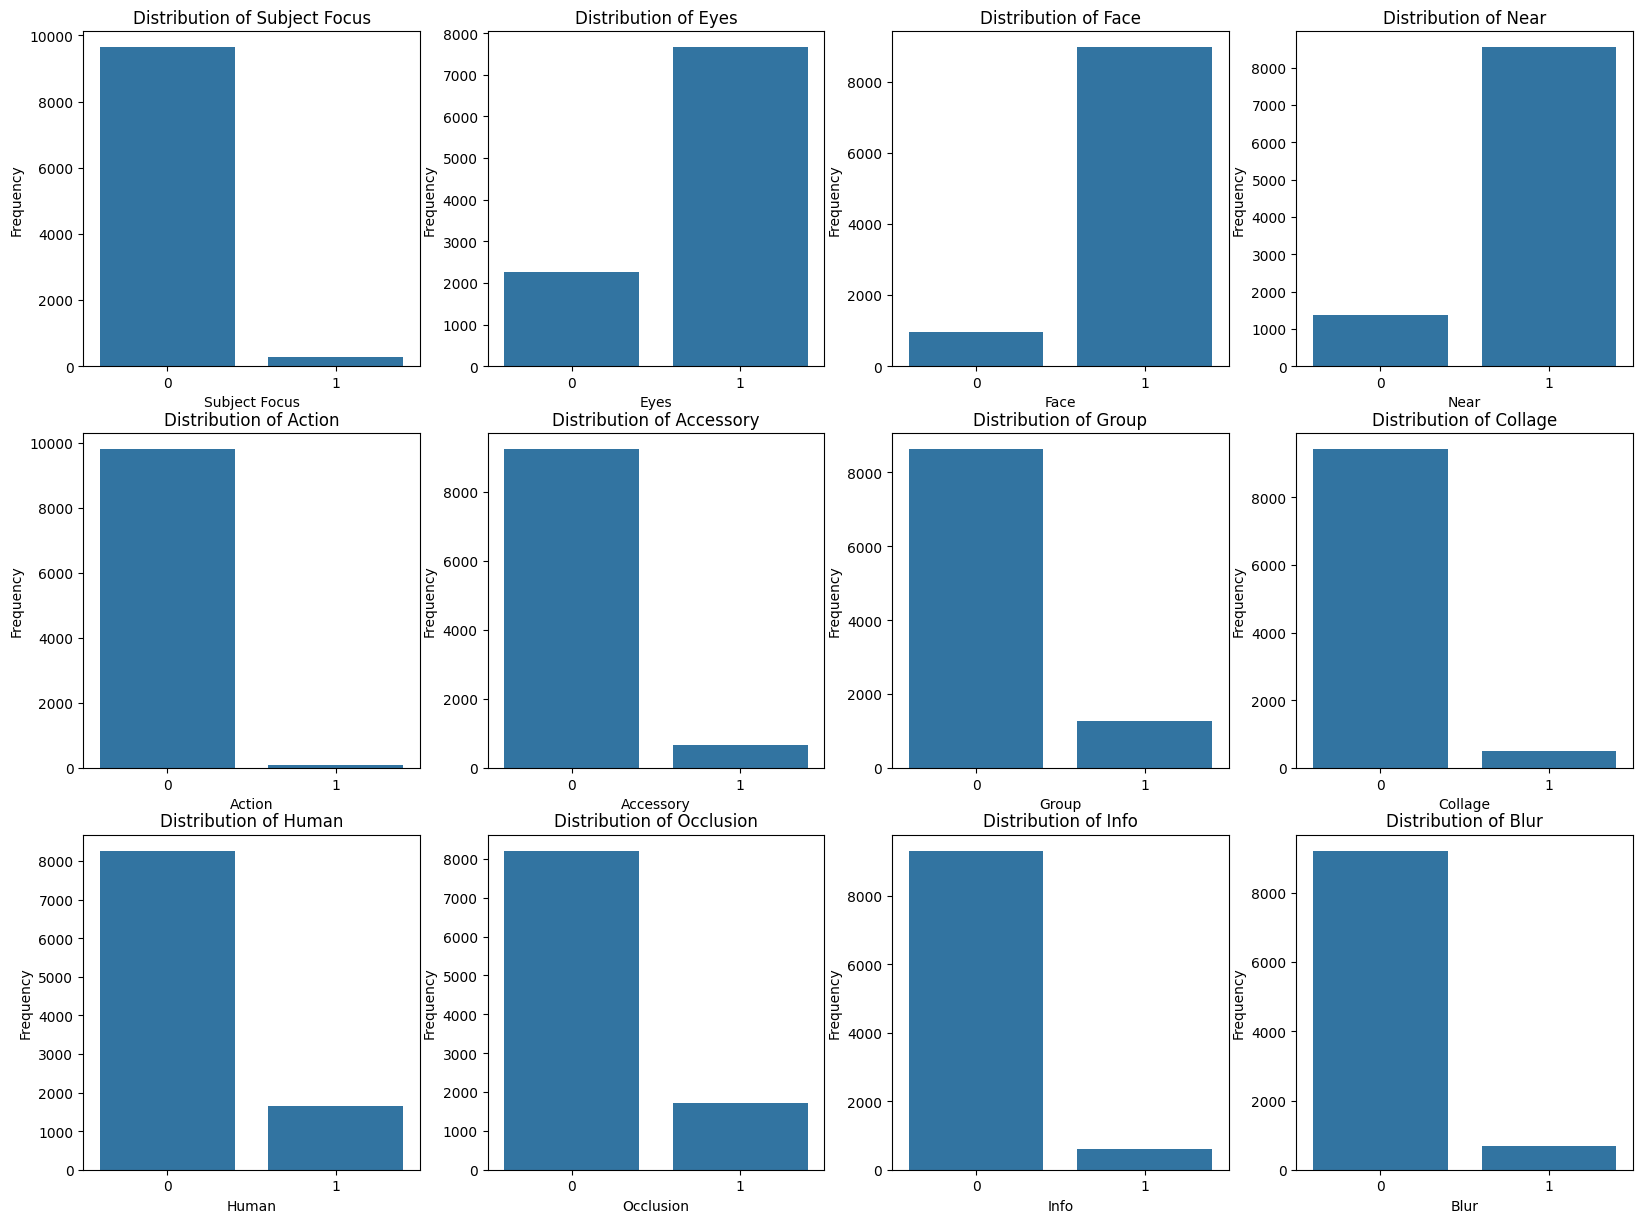

In [7]:
# Plot the distribution of each feature in a subplot
plt.subplots(figsize=(20, 20))
for i, feature in enumerate(cols):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=train_data[feature], data=train_data)
    plt.title('Distribution of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

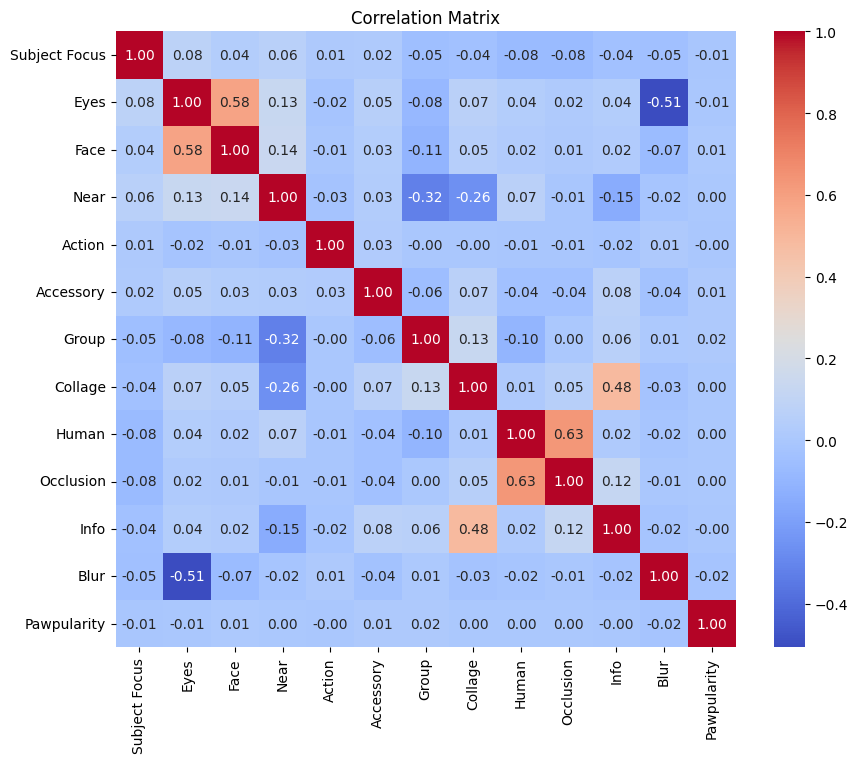

In [8]:
## Correlation between features and target variable

correlation_matrix = train_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


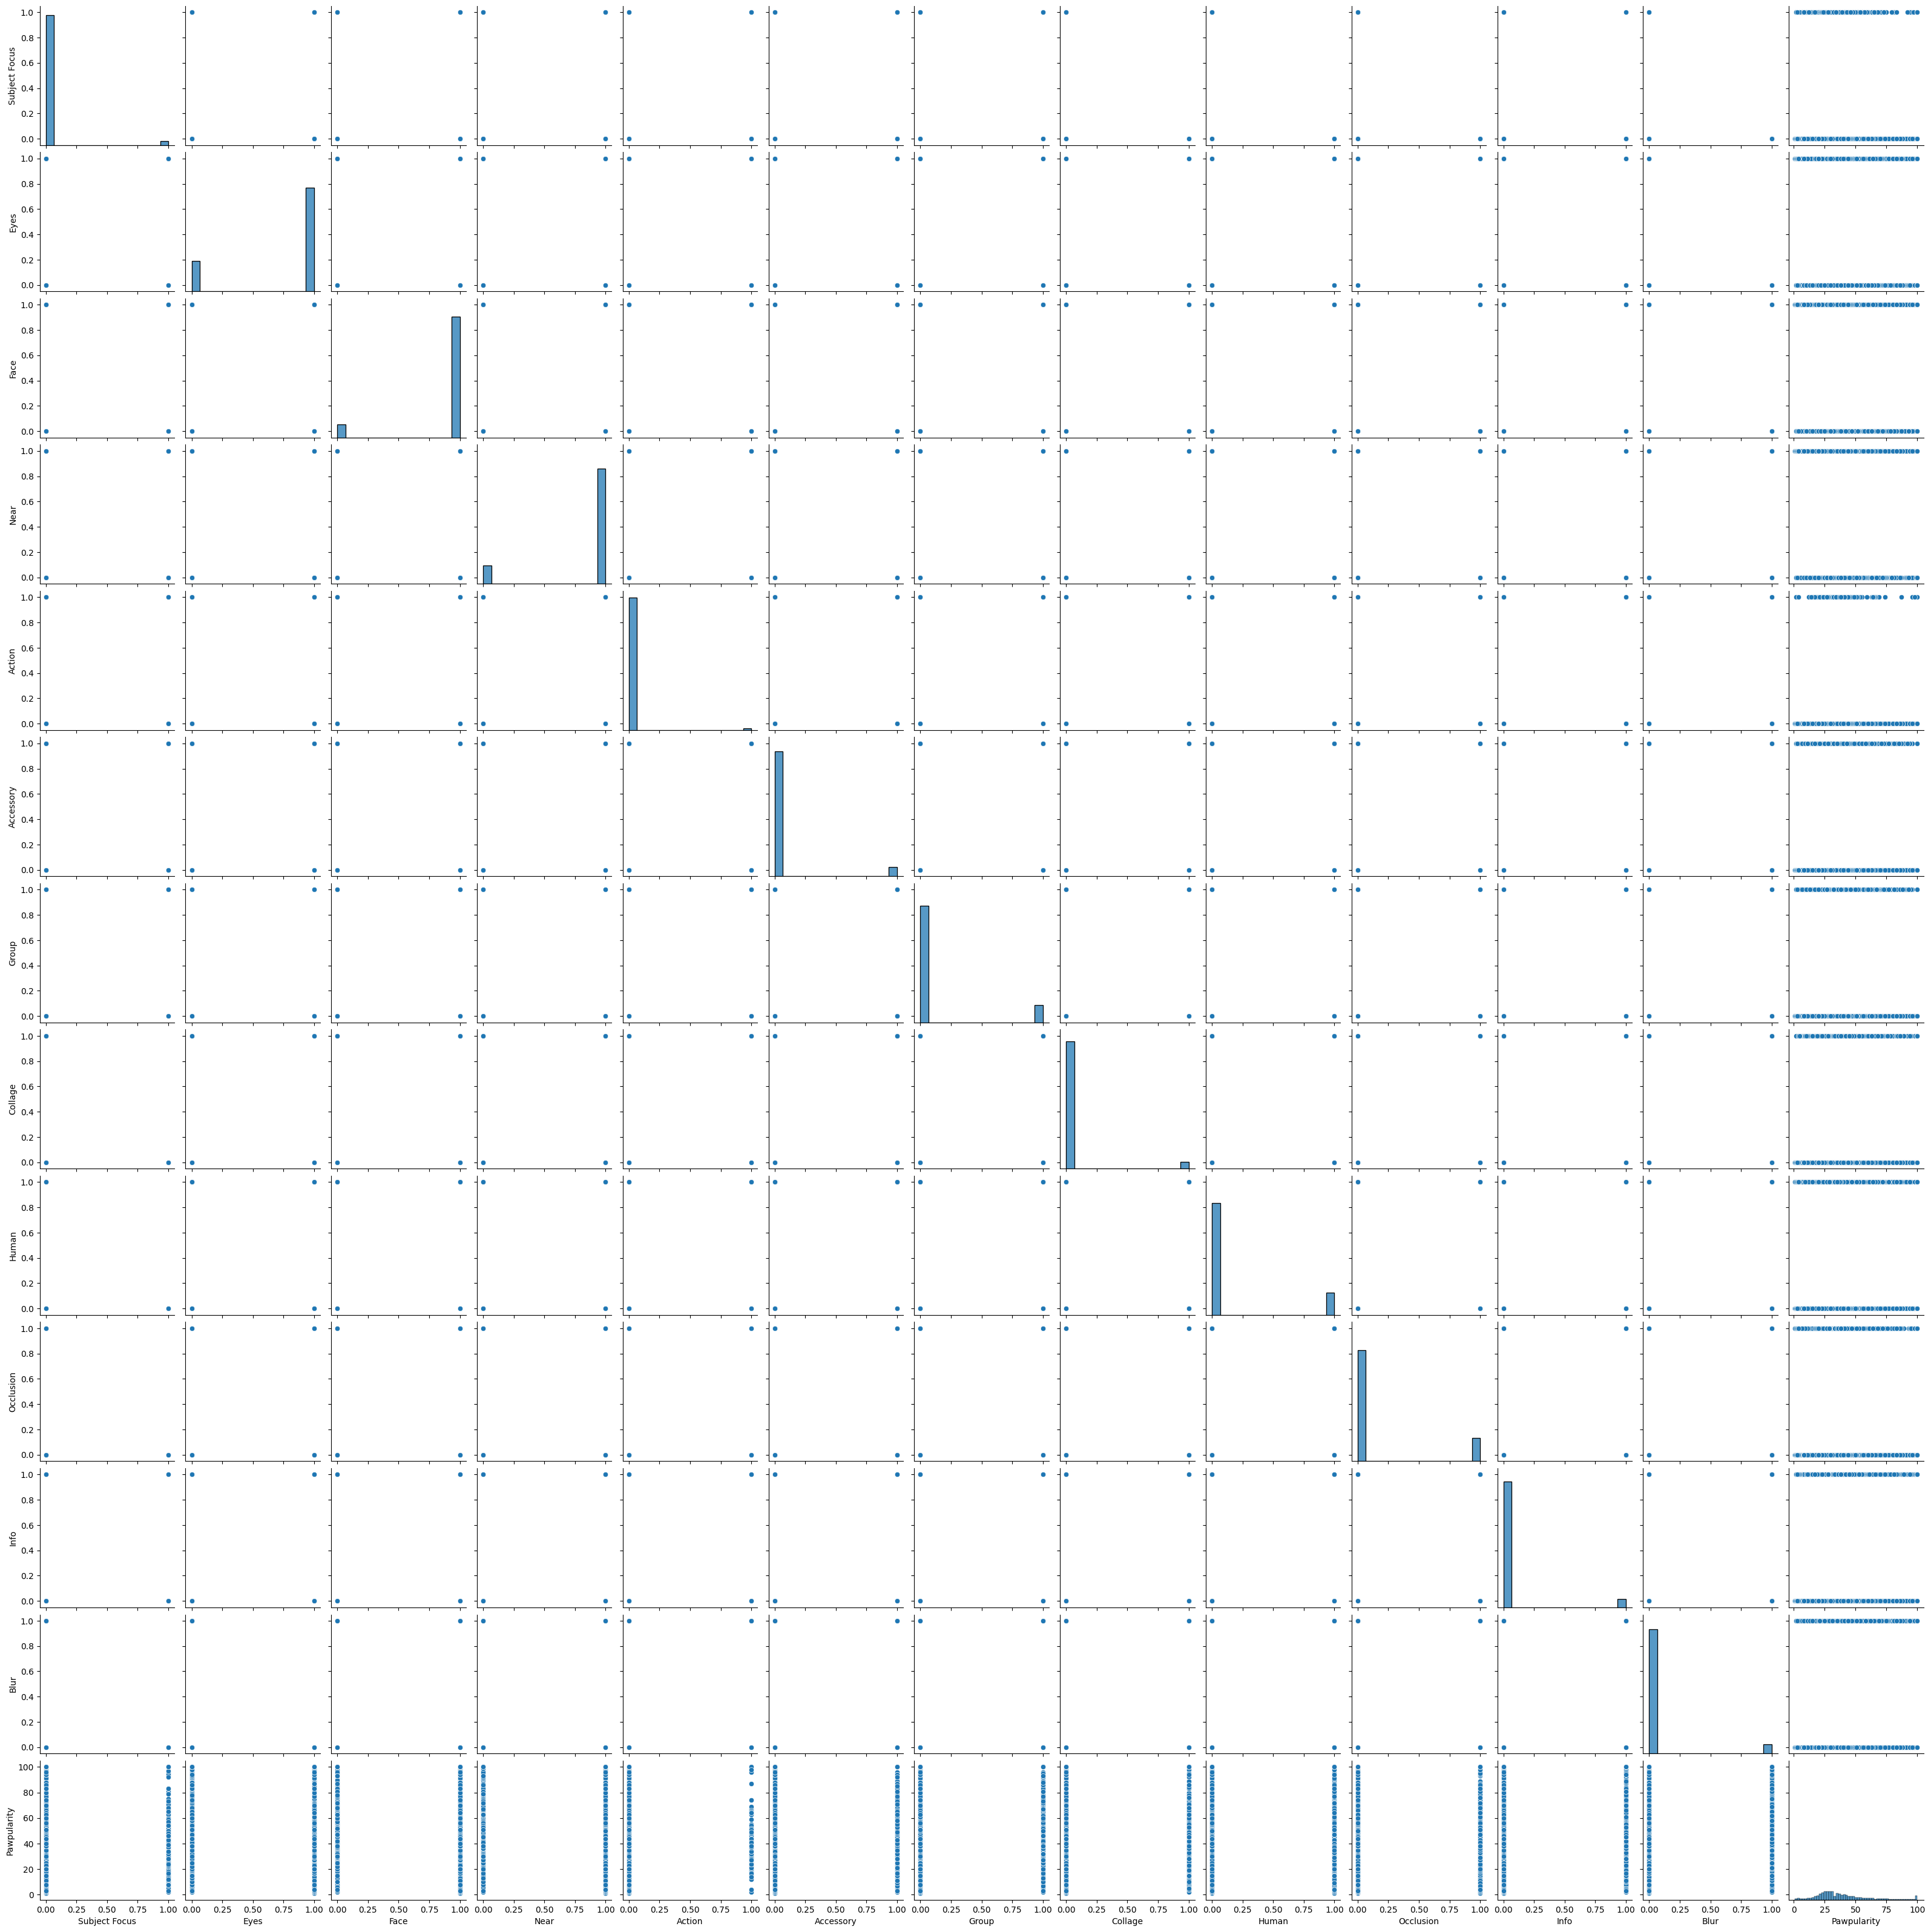

In [9]:
sns.pairplot(train_data, height=2.5)
plt.show()

In [ ]:
for feature in cols:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=train_data[feature], y=train_data['Pawpularity'])
    plt.title('Boxplot of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Pawpularity')
    plt.show()

In [11]:
## Trying association rule mining
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Convert the categorical variables to numerical
# Binarize the Pawpularity variable, making zero the values below the 75th percentile and one the values above the 75th percentile
bin_train_data = train_data.copy()
bin_train_data['Pawpularity'] = np.where(bin_train_data['Pawpularity'] >= 46, 1, 0)
 

assoc_data = pd.get_dummies(bin_train_data)

# Get the frequent itemsets
frequent_itemsets = apriori(assoc_data, min_support=0.01, use_colnames=True)
#frequent_itemsets.head()

# Get the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
#print(rules.head())

rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])
# Show the rules that have the Pawpularity variable in the consequent and sort them by confidence and lift
sorted_rules = rules[rules['consequents'].astype(str).str.contains('Pawpularity')].sort_values(['confidence', 'lift'], ascending=[False, False])
sorted_rules.head(10)


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
352,"(Info, Near)",(Pawpularity),0.040658,0.261905,0.011905,0.292804,1.117979,0.001256,1.043693,0.110001
783,"(Info, Near, Face)",(Pawpularity),0.037631,0.261905,0.010997,0.292225,1.115769,0.001141,1.042839,0.107814
711,"(Near, Face, Accessory)",(Pawpularity),0.057708,0.261905,0.016546,0.286713,1.094723,0.001432,1.034781,0.091826
252,"(Face, Accessory)",(Pawpularity),0.063862,0.261905,0.018261,0.285940,1.091771,0.001535,1.033660,0.089791
537,"(Eyes, Face, Collage)",(Pawpularity),0.044290,0.261905,0.012611,0.284738,1.087182,0.001011,1.031923,0.083907
324,"(Near, Accessory)",(Pawpularity),0.061037,0.261905,0.017353,0.284298,1.085500,0.001367,1.031288,0.083885
542,"(Eyes, Collage)","(Pawpularity, Face)",0.044391,0.237692,0.012611,0.284091,1.195208,0.002060,1.064812,0.170912
188,"(Eyes, Collage)",(Pawpularity),0.044391,0.261905,0.012611,0.284091,1.084711,0.000985,1.030990,0.081723
39,(Accessory),(Pawpularity),0.067797,0.261905,0.019169,0.282738,1.079545,0.001412,1.029046,0.079043
154,"(Eyes, Accessory)",(Pawpularity),0.057910,0.261905,0.016344,0.282230,1.077605,0.001177,1.028317,0.076443


From this analysisi, we can see that the variable combinations that influence our pawpularity the most are (Near, info), (Face, Info, Near), (Face, Accessory, Near), (Face, Accessory) and (Face, Collage, Eyes)

In [12]:
# get the antecedents of the top ten sorted rules and show the frequency of each antecedent
top_ten = sorted_rules.head(10)
top_ten_antecedents = top_ten['antecedents'].astype(str)
top_ten_antecedents = top_ten_antecedents.str.replace('frozenset', '')
top_ten_antecedents = top_ten_antecedents.str.replace('(', '')
top_ten_antecedents = top_ten_antecedents.str.replace(')', '')
top_ten_antecedents = top_ten_antecedents.str.replace('{', '')
top_ten_antecedents = top_ten_antecedents.str.replace('}', '')
top_ten_antecedents = top_ten_antecedents.str.replace("'", '')
top_ten_antecedents = top_ten_antecedents.str.replace(" ", '')
top_ten_antecedents = top_ten_antecedents.str.split(',')
top_ten_antecedents = top_ten_antecedents.explode()
top_ten_antecedents = top_ten_antecedents.value_counts()
top_ten_antecedents = top_ten_antecedents.reset_index()
top_ten_antecedents.columns = ['Feature', 'Frequency']
top_ten_antecedents


,Feature,Frequency
0,Accessory,5
1,Near,4
2,Face,4
3,Eyes,4
4,Collage,3
5,Info,2


Coefficients: 
 [ 1.51140481  0.12904325  1.47327495 -0.7817249   0.43252675]
Mean squared error: 442.38
Coefficient of determination: -0.00


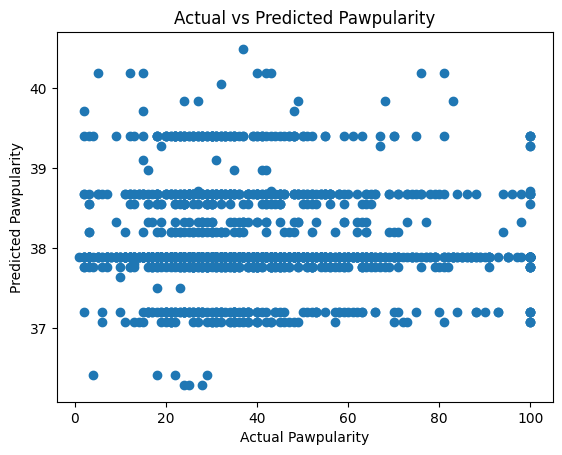

In [13]:
# Train a regression model using the top five antecedents and the Pawpularity variable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Get the top five antecedents
top_five = top_ten_antecedents.head(5)
top_five = top_five['Feature']
top_five = top_five.tolist()

# Get the training data
X = train_data[top_five]
y = train_data['Pawpularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Get the model performance metrics
print('Coefficients: \n', model.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()



Accuracy: 0.74


[[1470    0]
 [ 513    0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1470
           1       0.00      0.00      0.00       513

    accuracy                           0.74      1983
   macro avg       0.37      0.50      0.43      1983
weighted avg       0.55      0.74      0.63      1983



c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

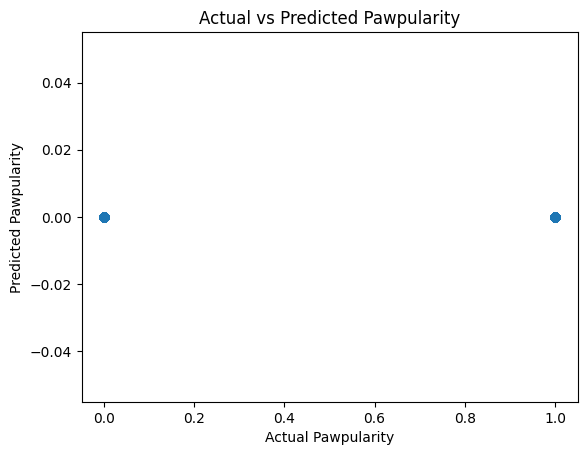

In [14]:
# Now do it with a classification model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Binarize the Pawpularity variable, making zero the values below the 75th percentile and one the values above the 75th percentile
bin_train_data = train_data.copy()
bin_train_data['Pawpularity'] = np.where(bin_train_data['Pawpularity'] >= 46, 1, 0)

# Get the training data
X = bin_train_data[top_five]
y = bin_train_data['Pawpularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Get the model performance metrics
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

# Get the X_train and y_train data for the final model
X_train = train_data.drop(['Pawpularity'], axis=1)
y_train = train_data['Pawpularity']

# Use a train test split to get a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((7929, 12), (1983, 12), (7929,), (1983,))

In [ ]:
## Use a  svr model to predict the target variable
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.0001], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(SVR(), param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)

# Get the best parameters
best_aparams = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.068 total time=   2.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.041 total time=   2.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.036 total time=   2.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.062 total time=   2.3s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.073 total time=   2.3s
[CV 1/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.068 total time=   1.1s
[CV 2/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.040 total time=   1.1s
[CV 3/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.036 total time=   1.1s
[CV 4/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.061 total time=   1.1s
[CV 5/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.075 total time=   1.1s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.067 total time=   2.3s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;,

In [ ]:
best_aparams, best_estimator

({'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, SVR(C=10, gamma=0.1))

In [11]:
# Make predictions
y_pred = best_estimator.predict(X_val)

# Get the model performance metrics
print('Mean squared error: %.2f' % mean_squared_error(y_val, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_val, y_pred))



Mean squared error: 462.93
Coefficient of determination: -0.05


In [16]:
# Create a decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

best_params, best_estimator


Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.005 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.002 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.006 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.002 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.003 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.005 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.002 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.006 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.002 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples

({'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2},
 DecisionTreeRegressor(max_depth=2, min_samples_leaf=2))

In [17]:
# Make predictions with the best estimator
y_pred = best_estimator.predict(X_val)

# Get the model performance metrics
print('Mean squared error: %.2f' % mean_squared_error(y_val, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_val, y_pred))

Mean squared error: 441.87
Coefficient of determination: 0.00


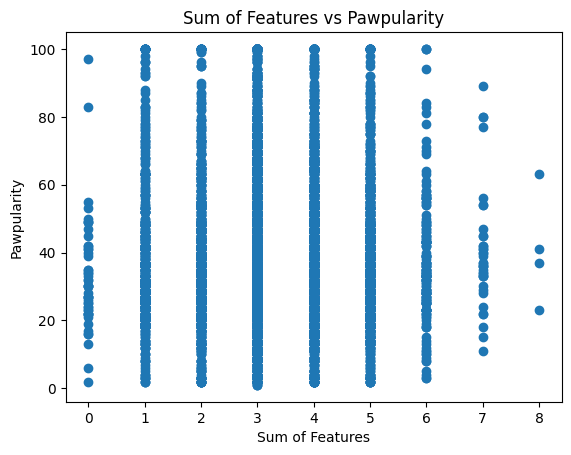

In [31]:
# Create a feature that is the sum of all the other features and use a bisserial correlation to see if there is a relationship between the new feature and the target variable

if 'sum' in X_train.columns:
    X_train = X_train.drop(['sum'], axis=1)
# Get the sum of all the features
X_train['sum'] = X_train.sum(axis=1)

# Get the correlation between the new feature and the target variable using Pearson's correlation
corr = X_train['sum'].corr(y_train, method='pearson')

# Plot the new feature against the target variable
plt.scatter(X_train['sum'], y_train)
plt.xlabel('Sum of Features')
plt.ylabel('Pawpularity')
plt.title('Sum of Features vs Pawpularity')
plt.show()


In [4]:
# Get the bissieral correlation between all the binary features and the target variable

# Get the binary features
bin_train_data = X_train.copy()

from scipy.stats import pointbiserialr

# Get the correlation between the binary features and the target variable
corr_list = []
for feature in bin_train_data.columns:
    # Append the column name to the corr object
    corr = pointbiserialr(bin_train_data[feature], y_train)
    corr_list.append((corr, feature))

# Get the correlation values
corr_list

[(SignificanceResult(statistic=-0.006873259850662706, pvalue=0.540577658033581),
  'Subject Focus'),
 (SignificanceResult(statistic=-0.0019758577016287943, pvalue=0.8603626468075752),
  'Eyes'),
 (SignificanceResult(statistic=0.012982353110208851, pvalue=0.2477305696714798),
  'Face'),
 (SignificanceResult(statistic=0.002247301262543508, pvalue=0.8414184119113994),
  'Near'),
 (SignificanceResult(statistic=0.0018828236386479495, pvalue=0.8668746678311112),
  'Action'),
 (SignificanceResult(statistic=0.018820008707120008, pvalue=0.09379489433768222),
  'Accessory'),
 (SignificanceResult(statistic=0.017735477164355598, pvalue=0.11430634022892946),
  'Group'),
 (SignificanceResult(statistic=0.005484598421158254, pvalue=0.6253356825307141),
  'Collage'),
 (SignificanceResult(statistic=0.0008954854142115561, pvalue=0.9364552736197383),
  'Human'),
 (SignificanceResult(statistic=-0.0009555533921340112, pvalue=0.9322027258617633),
  'Occlusion'),
 (SignificanceResult(statistic=-0.002306446649

| Variable    | Statistic   | P-value     | Significant |
|-------------|-------------|-------------|-------------|
| Subject Focus | -0.00687  | 0.5406    | No          |
| Eyes        | -0.00198  | 0.8604    | No          |
| Face        | 0.01298   | 0.2477    | No          |
| Near        | 0.00225   | 0.8414    | No          |
| Action      | 0.00188   | 0.8669    | No          |
| Accessory   | 0.01882   | 0.09379   | No          |
| Group       | 0.01774   | 0.1143    | No          |
| Collage     | 0.00548   | 0.6253    | No          |
| Human       | 0.00090   | 0.9365    | No          |
| Occlusion   | -0.00096  | 0.9322    | No          |
| Info        | -0.00231  | 0.8373    | No          |
| Blur        | -0.02089  | 0.06288   | Yes         |
| sum         | 0.00766   | 0.4952    | No          |


In [26]:
X_train

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
9136,0,1,1,1,0,0,0,0,0,0,0,0
8620,0,1,1,1,0,0,1,0,0,0,0,0
8412,0,1,1,0,0,0,0,0,0,0,0,0
7794,0,1,1,1,0,0,0,1,0,0,1,0
4394,0,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,1,1,1,0,0,0,0,1,1,0,0
5191,0,1,1,1,0,0,0,0,0,0,0,0
5390,0,1,1,1,0,0,0,0,0,0,0,0
860,0,1,1,1,0,0,0,0,1,0,0,0


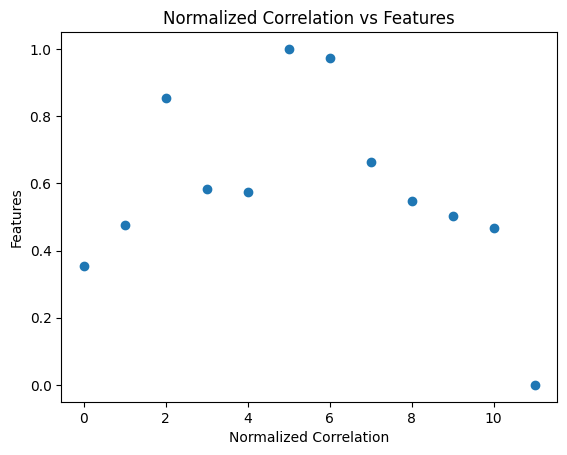

[0,
 0,
 0.852993502008329,
 0.5826585444751503,
 0.5734801031992446,
 1.0,
 0.9726888334851992,
 0.664181633726622,
 0.5486165030265129,
 0.5020028020210052,
 0,
 0]

In [27]:
# Get the correlation values and normalize them

# Get the correlation values
corr_val = [corr[0][0] for corr in corr_list]
# Normalize the correlation values with a min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
corr_norm = scaler.fit_transform(np.array(corr_val).reshape(-1, 1))

#Plot the normalized correlation values
plt.scatter(range(len(corr_norm)), corr_norm)
plt.xlabel('Normalized Correlation')
plt.ylabel('Features')
plt.title('Normalized Correlation vs Features')
plt.show()

# If the list corr_norm has a value smaller than 0.5, turn it 0
corr_norm = [0 if corr < 0.5 else corr[0] for corr in corr_norm]
corr_norm



In [28]:
# Add a feature that is the weighted sum of the binary features multiplied by the normalized correlation values
bin_train_data = X_train.copy()
bin_train_data['sum'] = bin_train_data @ corr_norm
bin_train_data.head()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,sum
9136,0,1,1,1,0,0,0,0,0,0,0,0,1.435652
8620,0,1,1,1,0,0,1,0,0,0,0,0,2.408341
8412,0,1,1,0,0,0,0,0,0,0,0,0,0.852994
7794,0,1,1,1,0,0,0,1,0,0,1,0,2.099834
4394,0,1,1,1,0,0,0,0,0,0,0,0,1.435652


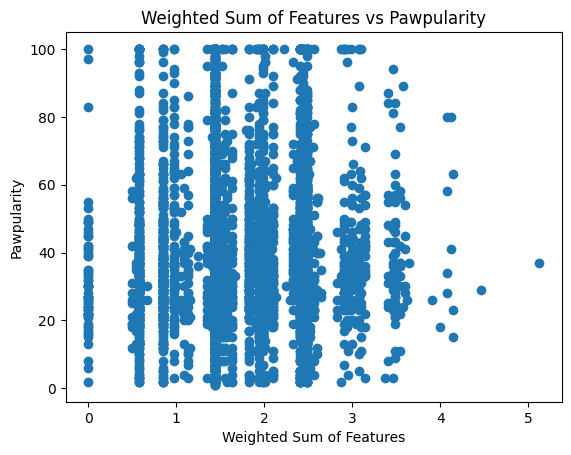

In [29]:
# Plot the new feature against the target variable
plt.scatter(bin_train_data['sum'], y_train)
plt.xlabel('Weighted Sum of Features')
plt.ylabel('Pawpularity')
plt.title('Weighted Sum of Features vs Pawpularity')
plt.show()

Linear Regression:
Coefficients: 
 [[0.83068088]]
Mean squared error: 419.22
Coefficient of determination: 0.00


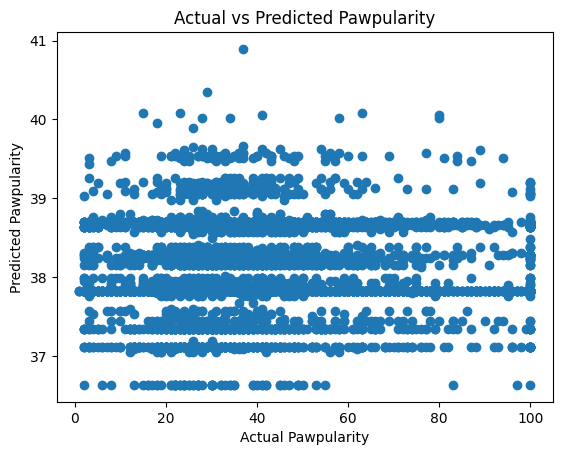

Decision Tree Regressor:
Mean squared error: 414.56
Coefficient of determination: 0.01


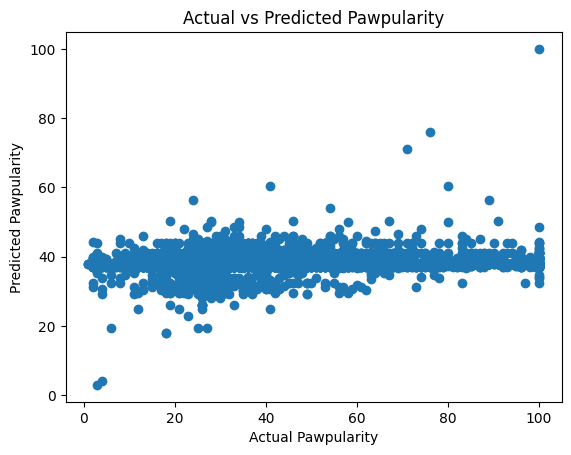

In [34]:
# Train a model using the new feature in a Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Get the training data
X = bin_train_data['sum'].to_numpy().reshape(-1, 1)
y = y_train.values.reshape(-1, 1)

# Train the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Get the model performance metrics
print('Linear Regression:')
print('Coefficients: \n', model.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y, y_pred))

# Plot the predictions against the actual values
plt.scatter(y, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()

# Train a model using the new feature in a Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Get the model performance metrics
print('Decision Tree Regressor:')
print('Mean squared error: %.2f' % mean_squared_error(y, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y, y_pred))

# Plot the predictions against the actual values
plt.scatter(y, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()
